In [ ]:
'''
Linear Regression
1. Simple/Univariate Linear Regression (where 1 input col in dataset and one Output col)
2. Multiple Linear Regression (Where more than 1 input cols in dataset and one output col)
Now lets work on with Salary_Data.csv
'''

'\nLinear Regression\n1. Simple/Univariate Linear Regression (where 1 input col in dataset and one Output col)\n2. Multiple Linear Regression (Where more than 1 input cols in dataset and one output col)\nNow lets work on with Salary_Data.csv\n'

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df = pd.read_csv('/kaggle/input/salary/Salary_Data.csv')
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [8]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

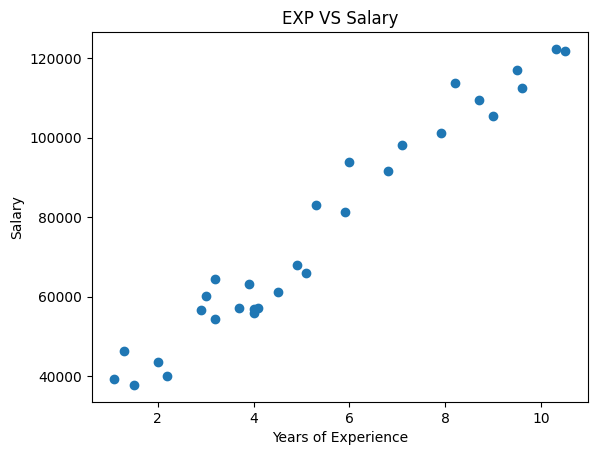

In [9]:
plt.scatter(df['YearsExperience'], df['Salary'])
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("EXP VS Salary")
plt.show()

In [10]:
X = df.iloc[:,:-1].values
y = df.iloc[:,1].values

# while splitting in X = df.iloc[:,0] dont use this, it gives 1d array, either use with :-1, [0]

In [11]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression

lg = LinearRegression()

In [17]:
lg.fit(X_train, y_train)

LinearRegression()

In [18]:
lg.predict([X[0], X[1]])

array([35687.77986711, 37572.54293172])

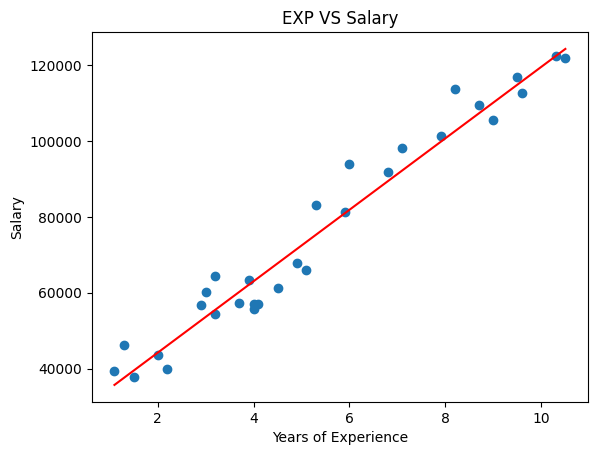

In [19]:
plt.scatter(df['YearsExperience'], df['Salary'])
plt.plot(X, lg.predict(X), color='red')
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("EXP VS Salary")
plt.show()

In [20]:
# we know our line equation, y = mx + c
m = lg.coef_
c = lg.intercept_

In [25]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [27]:
y_pred = lg.predict(X_test)
print("MAE", mean_absolute_error(y_test, y_pred))
print("MSE", mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 score", r2_score(y_test, y_pred))

MAE 6286.453830757749
MSE 49830096.85590839
RMSE 7059.04362190151
R2 score 0.9024461774180497


In [34]:
# Something other (optional)
'''
In cross-validation:

The dataset is split into k folds (e.g., 5 folds for cv=5).
For each fold:
One fold is used as the validation set (to test the model).
The remaining folds are used as the training set (to train the model).
This process repeats for each fold, ensuring that every part of the dataset is used as a validation set once.
'''
from sklearn.model_selection import cross_val_score

scores = cross_val_score(LinearRegression(), X, y, cv=5, scoring="r2")
print(scores)

[ 0.3595933  -1.24422823  0.25052696  0.29699762  0.07028896]
